# Fig 8 Plots

This notebook generates the plot for Fig 8B. The simulation data for this figure is located in `data/ExperimentGuitarSFLearning` (baseline experiment), `data/ExperimentGuitarSFTransfer` (SF-learning with SF transfer), and `data/ExperimentGuitarRewardPredictive` (the reward-predictive model). This data set can be reproduced by running

```
python -m main -e ExperimentSetGuitarSFLearning
python -m main -e ExperimentSetGuitarSFTransfer
python -m main -e ExperimentSetGuitarRewardPredictive
```

The following cell loads the data set from disk. This may take a few minutes.

In [1]:
import warnings; warnings.filterwarnings('ignore')

import numpy as np
import rewardpredictive as rp
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', **{'family': 'serif', 'size': 9})
rc('text', usetex=True)

exp_sflearning = rp.ExperimentSetGuitarSFLearning.load().get_best_experiment()
exp_sftransfer = rp.ExperimentSetGuitarSFTransfer.load().get_best_experiment()
exp_sfrewpred = rp.ExperimentSetGuitarRewardPredictive.load().get_best_experiment()

Retrieving experiment(s) with hyper-parameter(s):
	repeats: 10
	learning_rate_sf: 0.1
	learning_rate_reward: 0.9
	episodes: 100
Retrieving experiment(s) with hyper-parameter(s):
	repeats: 10
	learning_rate_sf: 0.9
	learning_rate_reward: 0.9
	episodes: 100
Retrieving experiment(s) with hyper-parameter(s):
	repeats: 10
	learning_rate_sf: 0.9
	learning_rate_reward: 0.9
	episodes: 100


In [2]:
! mkdir -p figure/guitar

Plot avg. episode length on each scale task.

### Fig 8B

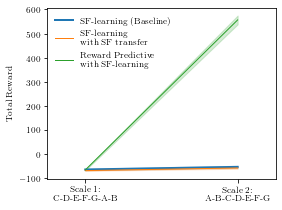

In [3]:
rew_sflearning = np.sum(exp_sflearning.results['total_reward'], axis=-1)
rew_sftransfer = np.sum(exp_sftransfer.results['total_reward'], axis=-1)
rew_sfrewpred = np.sum(exp_sfrewpred.results['total_reward'], axis=-1)

plt.figure(figsize=(4, 3))
rp.plot.mean_with_sem([1, 2], rew_sflearning, axis=0, color='C0', label='SF-learning (Baseline)', linewidth=2)
rp.plot.mean_with_sem([1, 2], rew_sftransfer, axis=0, color='C1', label='SF-learning\nwith SF transfer')
rp.plot.mean_with_sem([1, 2], rew_sfrewpred, axis=0, color='C2', label='Reward Predictive\nwith SF-learning')
plt.ylabel('Total Reward')
plt.xticks([1, 2], ['Scale 1:\nC-D-E-F-G-A-B', 'Scale 2:\nA-B-C-D-E-F-G'])
plt.xlim([0.75, 2.25])
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('figure/guitar/total_reward.pdf', bbox_inches='tight', pad_inches=.1, transparent=True)

### Fig 8C

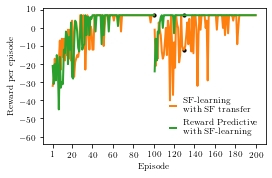

In [4]:
def plot_total_reward(total_reward, color, label, linewidth=1):
    x_steps = np.shape(total_reward)[-1]
    for i, rew in enumerate(total_reward):
        if i == 0:
            plt.plot(np.arange(x_steps) + 1, rew, c=color, linewidth=linewidth, label=label)
        else:
            plt.plot(np.arange(x_steps) + 1 + i * x_steps, rew, c=color, linewidth=linewidth)


plt.figure(figsize=(4, 2.5))
plot_total_reward(exp_sftransfer.results['total_reward'][1], 'C1', 'SF-learning\nwith SF transfer', 2)
plot_total_reward(exp_sfrewpred.results['total_reward'][1], 'C2', 'Reward Predictive\nwith SF-learning', 2)
x_list = [100, 130, 130]
y_list = [
    exp_sfrewpred.results['total_reward'][1][0, x_list[0]-1],
    exp_sfrewpred.results['total_reward'][1][1, x_list[1]-100-1],
    exp_sftransfer.results['total_reward'][1][1, x_list[2]-100-1]
]
plt.scatter(x_list, y_list, color='k', s=10)
plt.ylabel('Reward per episode')
plt.xlabel('Episode')
plt.xticks([1] + list(np.arange(20, 201, 20)))
plt.yticks(np.arange(-60, 11, 10))
plt.ylim([-64, 11])
plt.legend(loc=4, frameon=False, handlelength=0.7)
plt.savefig('figure/guitar/episode_reward.pdf', bbox_inches='tight', pad_inches=.1, transparent=True)

Note sequences played by each agent. These sequences were used to create the supporting audio files.

In [5]:
idx_list = [100, 130]

print('Scales for SF-learning with SF transfer:')
traj_list_sftransfer = rp.utils.get_trajectory_list(exp_sftransfer, 0)
for i in idx_list:
    traj = traj_list_sftransfer[i - 1]
    print('Id: {}, notes: {}'.format(i, [rp.guitar.notes[a] for a in traj.all()[1]]))

print('Scales for Reward Predictive with SF-learning:')
traj_list_rewpred = rp.utils.get_trajectory_list(exp_sfrewpred, 0)
for i in idx_list:
    traj = traj_list_rewpred[i - 1]
    print('Id: {}, notes: {}'.format(i, [rp.guitar.notes[a] for a in traj.all()[1]]))

Scales for SF-learning with SF transfer:
Id: 100, notes: ['C', 'D', 'E', 'F', 'G', 'A', 'B']
Id: 130, notes: ['A', 'B', 'D', 'A#', 'F#', 'C', 'D', 'E', 'F', 'D', 'C#', 'A', 'E', 'A#', 'D#', 'B', 'G#', 'C', 'F', 'F#', 'G']
Scales for Reward Predictive with SF-learning:
Id: 100, notes: ['C', 'D', 'E', 'F', 'G', 'A', 'B']
Id: 130, notes: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
